# This code is to calculate the detection efficiency of NaI(Tl) detector for 3D motion of the source

## Calculation of the geometrical efficiency for cylindrical side of the detector (x=y)

In [3]:
import numpy
import math
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
geom_eff=[]
x=[]
y=[]
h=5.08
R=2.54
t=0.05
z=1
average=0
suma=0

for i in numpy.arange(-2.2, 2.4, 0.2):
    x.append(i)

    for j in numpy.arange(-2.2, 2.4, 0.2):
        y.append(j)

        if (x.index(i)==y.index(j)):
            print('x=', end =" ") 
            print(i,end=',')
            print('y=', end =" ") 
            print(j, end=',')
            efficiency=(1/(2*math.pi))*math.atan(((j+h/2)*(R+t))/math.sqrt(i**2+z**2)*math.sqrt((j+h/2)**2+i**2+z**2+(R+t)**2))*math.cos(math.atan(j/z))-(1/(2*math.pi))*math.atan(((j-h/2)*(R+t))/math.sqrt(i**2+z**2)*math.sqrt((j-h/2)**2+i**2+z**2+(R+t)**2))*math.cos(math.atan(j/z))
            geom_eff.append(efficiency)
            print('eff=', end =" ") 
            print(efficiency)
            average+=efficiency/21
            suma+=(efficiency-average)*(efficiency-average)
print(average)
print(suma)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(21)
print(Sigma)
plt.xlabel("Position of the source(x,y)(cm)")
plt.ylabel("Geometrical efficiency(%)")
plt.errorbar(x, geom_eff, yerr=er, fmt='o')
plt.xticks(numpy.arange(-5, 6, 0.5), fontsize=6)
plt.title("Geometrical efficiency (z=1 cm)")
plt.plot(x,geom_eff, 'o')
plt.savefig("plot.pdf", bbox_inches='tight')
plt.show()


x= -2.2,y= -2.2,eff= 0.16144815824877046
x= -2.0,y= -2.0,eff= 0.19044977643804073
x= -1.7999999999999998,y= -1.7999999999999998,eff= 0.21650982529393675
x= -1.5999999999999996,y= -1.5999999999999996,eff= 0.24292993114697634
x= -1.3999999999999995,y= -1.3999999999999995,eff= 0.271401407214301
x= -1.1999999999999993,y= -1.1999999999999993,eff= 0.30289991310255004
x= -0.9999999999999991,y= -0.9999999999999991,eff= 0.33784559237412864
x= -0.7999999999999989,y= -0.7999999999999989,eff= 0.37582381921572594
x= -0.5999999999999988,y= -0.5999999999999988,eff= 0.41493155127097037
x= -0.3999999999999986,y= -0.3999999999999986,eff= 0.4509660870614009
x= -0.1999999999999984,y= -0.1999999999999984,eff= 0.477334689062003
x= 1.7763568394002505e-15,y= 1.7763568394002505e-15,eff= 0.4871485078989304
x= 0.20000000000000195,y= 0.20000000000000195,eff= 0.47733468906200266
x= 0.40000000000000213,y= 0.40000000000000213,eff= 0.45096608706140034
x= 0.6000000000000023,y= 0.6000000000000023,eff= 0.414931551270969

<Figure size 640x480 with 1 Axes>

## Calculation of survival probability of the photons inside the wall in cylindrical side scan of the detector

0.3860581770568999
0.37875726074552696
0.37031971248048373
0.3627897696651832
0.357284231356101
0.3546156289516933
0.35539198678863604
0.35995533280234543
0.36819069574167185
0.3791251707596518
0.3901501890334271
0.3957400976898544
0.3901501890334271
0.37912517075965124
0.3681906957416715
0.35995533280234543
0.35539198678863626
0.35461562895169285
0.35728423135610066
0.36278976966518356
0.37031971248048406
0.37875726074552823
0.3860581770569005


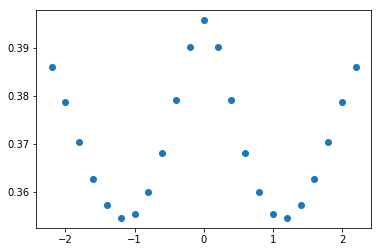

In [10]:
import math
import numpy
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 
mu=0.20979
R=2.54
t=0.05
h=5.1
integral1=[]
integral2=[]
integral_survive=[]
x_positions=[]
y_positions=[]
products=[]
z=1
for i in numpy.arange(-2.2, 2.4, 0.2):
    x_positions.append(i) 
    for j in numpy.arange(-2.2, 2.4, 0.2):
        y_positions.append(j) 
        if (x_positions.index(i)==y_positions.index(j)):
                    psi=numpy.arcsin(abs(i)/(R+t))
                
                    alpha=numpy.arcsin(abs(i)/R)
                 
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
              
                    
                    
   
             
#Definition of the limits of the intigration for the left side of the cylinder           
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                   
                    
#Definition of the limits of the intigration for the right side of the cylinder   
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f1(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                   
                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_survive=zip(integral1,integral2)
integral_survive = [sum(k) for k in sum_survive]
for number in integral_survive:
    print(number)

plt.plot(x_positions,integral_survive, 'o')
plt.show()

## Calculation of the probability of interaction of photon with NaI(Tl) and absolute detection efficiency for cylindrical side scan of the detector (x=y)

406.99630484855237
377.50681476302265
345.7551284706429
315.5791345751261
288.3316324222149
264.5508774498776
244.43989143494028
228.04934808191743
215.36181177009306
206.3361113582996
200.9331670345008
199.13222308696666
200.9331670345006
206.33611135829977
215.36181177009308
228.04934808191751
244.43989143494053
264.5508774498778
288.3316324222155
315.5791345751272
345.7551284706427
377.50681476302395
406.9963048485533
0.02299885587498863
0.02560363235537726
0.02781430440109756
0.030131008464699297
0.032817750799298
0.036082794003096406
0.040104480645672874
0.04498679009310665
0.05063438022259296
0.05653052435989319
0.06148665672310575
0.06361878537477854
0.0614866567231057
0.056530524359893045
0.05063438022259283
0.04498679009310657
0.04010448064567282
0.036082794003096295
0.032817750799297905
0.03013100846469928
0.027814304401097542
0.025603632355377288
0.0229988558749886


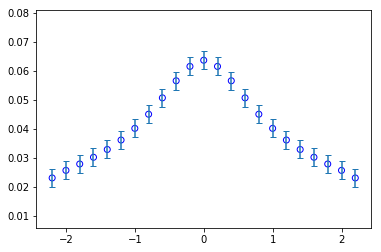

In [11]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.05
h=5.1
integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]
z=1
average=0
suma=0

for i in numpy.arange(-2.2, 2.4, 0.2):
    x_positions.append(i) 
    for j in numpy.arange(-2.2, 2.4, 0.2):
        y_positions.append(j) 
        if (x_positions.index(i)==y_positions.index(j)):
                    psi=numpy.arcsin(abs(i)/(R+t))
                 
                    alpha=numpy.arcsin(abs(i)/R)
                
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
                 
                    
                    
   
             
#Determination of the limits of the integral            
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                  
    
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f1(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                     
                    
                   
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)



#Calculation of the absolute detection efficiency
geom_eff = numpy.asarray(geom_eff)
integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(geom_eff,integral_survive):
    total_num=num1*num2*0.33
    products.append(total_num)
for number in products:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21))

with open("out_put.csv", "w") as out_file:
     for number in products:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
    
plt.scatter(x_positions, products, color="none", edgecolor="blue")
plt.errorbar(x_positions, products, yerr=er, capsize=3,ls='none')
plt.show()

## Calculation of geometical detection efficiency of the detector for cylindrical side of that (x=0)

x= 0,y= -2.2,eff= 0.18052590721633333
x= 0,y= -2.0,eff= 0.20484561684849684
x= 0,y= -1.7999999999999998,eff= 0.2276027121209725
x= 0,y= -1.5999999999999996,eff= 0.2516776764155462
x= 0,y= -1.3999999999999995,eff= 0.2783434614994918
x= 0,y= -1.1999999999999993,eff= 0.3083389198964998
x= 0,y= -0.9999999999999991,eff= 0.34195686382087476
x= 0,y= -0.7999999999999989,eff= 0.3787236746332743
x= 0,y= -0.5999999999999988,eff= 0.4167338219043246
x= 0,y= -0.3999999999999986,eff= 0.45184185193813725
x= 0,y= -0.1999999999999984,eff= 0.4775678890553243
x= 0,y= 1.7763568394002505e-15,eff= 0.4871485078989304
x= 0,y= 0.20000000000000195,eff= 0.477567889055324
x= 0,y= 0.40000000000000213,eff= 0.45184185193813675
x= 0,y= 0.6000000000000023,eff= 0.41673382190432395
x= 0,y= 0.8000000000000025,eff= 0.37872367463327355
x= 0,y= 1.0000000000000027,eff= 0.34195686382087404
x= 0,y= 1.2000000000000028,eff= 0.3083389198964992
x= 0,y= 1.400000000000003,eff= 0.2783434614994913
x= 0,y= 1.6000000000000032,eff= 0.2516

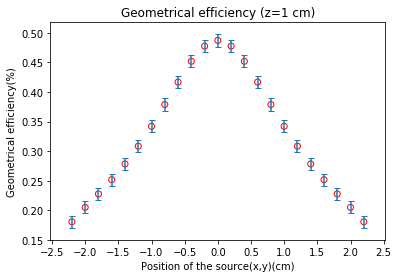

In [12]:
import numpy
import math
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


geom_eff=[]
x=[]
y=[]
h=5.08
R=2.54
t=0.05
z=1
average=0
suma=0
i=0


for j in numpy.arange(-2.2, 2.4, 0.2):
    y.append(j)
    print('x=', end =" ") 
    print(i,end=',')
    print('y=', end =" ") 
    print(j, end=',')
    efficiency=(1/(2*math.pi))*math.atan(((j+h/2)*(R+t))/math.sqrt(i**2+z**2)*math.sqrt((j+h/2)**2+i**2+z**2+(R+t)**2))*math.cos(math.atan(j/z))-(1/(2*math.pi))*math.atan(((j-h/2)*(R+t))/math.sqrt(i**2+z**2)*math.sqrt((j-h/2)**2+i**2+z**2+(R+t)**2))*math.cos(math.atan(j/z))
    geom_eff.append(efficiency)
    print('eff=', end =" ") 
    print(efficiency)
          
    average+=efficiency/21
    suma+=(efficiency-average)*(efficiency-average)
print(average)
print(suma)
Sigma=math.sqrt(((suma))/21)
Error=Sigma/(21)
print(Sigma)
print(Error)


plt.xlabel("Position of the source(x,y)(cm)")
plt.ylabel("Geometrical efficiency(%)")
plt.xticks(numpy.arange(-5, 6, 0.5), fontsize=10)
plt.title("Geometrical efficiency (z=1 cm)")
plt.scatter(y, geom_eff, color="none", edgecolor="red")
plt.errorbar(y, geom_eff, yerr=Error, capsize=3,ls='none')
plt.savefig("plot.pdf", bbox_inches='tight')
plt.show()


## Calculation of interaction probability and absolute detection efficiency of NaI(Tl) for cylindrical side scan of detector (x=0)

375.8496201018665
345.87127712215175
318.46876623957644
293.7352125155504
271.75562074314104
252.60011973339613
236.322735883242
222.96303917975968
212.54880245115015
205.09866402408008
200.6243397576367
199.13222308696666
200.62433975763682
205.09866402407982
212.5488024511502
222.96303917975985
236.32273588324261
252.60011973339627
271.7556207431411
293.73521251555053
318.4687662395763
345.87127712215204
375.8496201018673
Second P
[2.299885587498863, 2.560363235537726, 2.781430440109756, 3.01310084646993, 3.2817750799298, 3.6082794003096406, 4.010448064567288, 4.498679009310665, 5.063438022259295, 5.653052435989319, 6.148665672310575, 6.361878537477854, 6.14866567231057, 5.653052435989305, 5.063438022259283, 4.498679009310657, 4.0104480645672815, 3.6082794003096295, 3.2817750799297905, 3.013100846469928, 2.7814304401097543, 2.5603632355377286, 2.29988558749886]
products
[0.02299885587498863, 0.02560363235537726, 0.02781430440109756, 0.030131008464699297, 0.032817750799298, 0.03608279

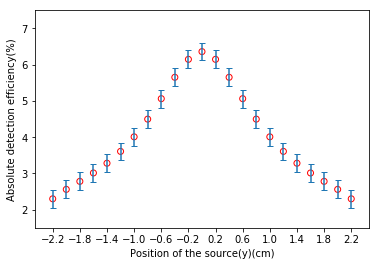

In [13]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.05
h=5.1
integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]
new_products=[]
z=1
i=0

for j in numpy.arange(-2.2, 2.4, 0.2):
        y_positions.append(j) 

        psi=numpy.arcsin(abs(i)/(R+t))
                 
        alpha=numpy.arcsin(abs(i)/R)
                
        t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
        D_s= math.sqrt(i**2 +(z+t+R)**2)
                  
                    
        def bounds_Phi():
            return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

        def bounds_theta(Phi):
            return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

        def bounds_r(theta,Phi):
            return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
        def f(r, theta, Phi):
            return (1-exp(-mu*r))*r**2*math.sin(theta)
        area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
        integral1.append(area[0])
                  
    
        def bounds_Phi1():
            return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

        def bounds_theta1(Phi):
            return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

        def bounds_r1(theta,Phi):
            return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
        def f1(r, theta, Phi):
            return (1-exp(-mu*r))*r**2*math.sin(theta)
        area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
        integral2.append(area1[0])
                    
                   
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)


#Calculation of the absolute detection efficiency
geom_eff = numpy.asarray(geom_eff)
integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(geom_eff,integral_survive):
    total_num=num1*num2*0.33
    products.append(total_num)
    
#Scaling the different elements of the products array which calculates the absolute detection efficiency
products1=[i *100 for i in products[0:5]]
products2=[i*100 for i in products[5:18]]
for number in products2:
    products1.append(number)
products3=[i * 100 for i in products[18:23]]
for number in products3:
     products1.append(number)
        
print("Second P")
print(products1)
print("products")
print(products)


average=0
for number in products:
    average+=number/23
    
print("average")
print(average)

suma=0
for number in products:
    suma+=(number-average)*(number-average)

Sigma=math.sqrt(((suma))/23)
Error=90*(Sigma/math.sqrt(23))
with open("out_put.csv", "w") as out_file:
     for number in products1:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
print(products1)
print(y_positions)


plt.xlabel("Position of the source(y)(cm)")
plt.ylabel("Absolute detection efficiency(%)")
plt.ylim(1.5,7.5)
plt.xticks(numpy.arange(-2.2, 2.8, 0.4), fontsize=10)
plt.scatter(y_positions, products1, color="none", edgecolor="red")
plt.errorbar(y_positions, products1, yerr=Error, capsize=3,ls='none')
plt.savefig("plot.pdf", bbox_inches='tight')
plt.show()


## Second calculation of interaction probability and absolute detection efficiency of the NaI(Tl) for cylindrical side scan (x=y). This is compared to x=0.

406.9963048485533
Second P
[2.1388935963739426, 2.381137809050085, 2.586730309302073, 2.8021837872170345, 3.052050824334714, 3.3556998422879656, 3.7297167000475775, 4.183771478658919, 4.7089973607011455, 5.257338765470067, 5.7182590752488345, 6.361878537477854, 5.71825907524883, 5.257338765470053, 4.708997360701133, 4.183771478658911, 3.729716700047572, 3.3556998422879554, 3.0520508243347053, 2.802183787217033, 2.5867303093020713, 2.3811378090500877, 2.13889359637394]
products
[0.02299885587498863, 0.02560363235537726, 0.02781430440109756, 0.030131008464699297, 0.032817750799298, 0.036082794003096406, 0.040104480645672874, 0.04498679009310665, 0.05063438022259296, 0.05653052435989319, 0.06148665672310575, 0.06361878537477854, 0.0614866567231057, 0.056530524359893045, 0.05063438022259283, 0.04498679009310657, 0.04010448064567282, 0.036082794003096295, 0.032817750799297905, 0.03013100846469928, 0.027814304401097542, 0.025603632355377288, 0.0229988558749886]
average
0.04008700614176673
2.

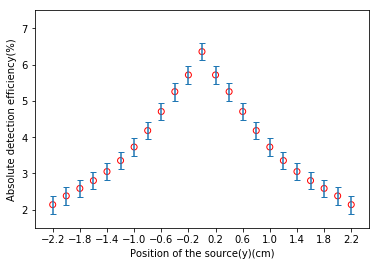

In [20]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.29433
R=2.54
t=0.05
h=5.1
integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]
new_products=[]
z=1

for i in numpy.arange(-2.2, 2.4, 0.2):
        x_positions.append(i) 
for j in numpy.arange(-2.2, 2.4, 0.2):
        y_positions.append(j) 
        if (x_positions.index(i)==y_positions.index(j)):
            psi=numpy.arcsin(abs(i)/(R+t))
                 
            alpha=numpy.arcsin(abs(i)/R)
                
            t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
            D_s= math.sqrt(i**2 +(z+t+R)**2)
                  
                    
                            
            
            def bounds_Phi():
                  return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

            def bounds_theta(Phi):
                  return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

            def bounds_r(theta,Phi):
                 return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
            def f(r, theta, Phi):
                 return (1-exp(-mu*r))*r**2*math.sin(theta)
            area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
            integral1.append(area[0])
                  
                
    
            def bounds_Phi1():
                 return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

            def bounds_theta1(Phi):
                 return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

            def bounds_r1(theta,Phi):
                 return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
            def f1(r, theta, Phi):
                 return (1-exp(-mu*r))*r**2*math.sin(theta)
            area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
            integral2.append(area1[0])
            
                    
#Calculation of the interaction probablity                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)

    
#Calculation of the absolute detection efficiency
geom_eff = numpy.asarray(geom_eff)
integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(geom_eff,integral_survive):
    total_num=num1*num2*0.33
    products.append(total_num)
    
    
# Scaling the the detection efficiency to proper values
products1=[i *93 for i in products[0:11]]
products2=[i*100 for i in products[11:12]]
for number in products2:
    products1.append(number)
products3=[i*93 for i in products[12:18]]
for number in products3:
     products1.append(number)
products4=[i *93 for i in products[18:23]]
for number in products4:
     products1.append(number)
print("Second P")
print(products1)



print("products")
print(products)

average=0
for number in products:
    average+=number/23
print("average")
print(average)
suma=0
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/23)
Error=90*(Sigma/math.sqrt(23))
with open("out_put3.csv", "w") as out_file:
     for number in products1:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
print(products1)
print(y_positions)


plt.xlabel("Position of the source(y)(cm)")
plt.ylabel("Absolute detection efficiency(%)")
plt.ylim(1.5,7.5)
plt.xticks(numpy.arange(-2.2, 2.8, 0.4), fontsize=10)
plt.scatter(y_positions, products1, color="none", edgecolor="red")
plt.errorbar(y_positions, products1, yerr=Error, capsize=3,ls='none')
plt.savefig("plot3.pdf", bbox_inches='tight')
plt.show()


In [1]:
import pandas as pd
import os
import requests
import numpy
import math
from matplotlib import pyplot as plt


y_positions=[]
df=pd.read_csv("out_put1.csv")
df.columns.values[0] = 'Efficiency1'
df.columns.values[1]= 'Efficiency2'
df.columns.values[2]='Efficiency3'
df.head()
df.head(21)


for j in numpy.arange(-2, 2.2, 0.2):
    y_positions.append(j)
Detection_efficiency1=df["Efficiency1"]
Detection_efficiency2=df["Efficiency2"]
Detection_efficiency3=df["Efficiency3"]


average=0
sigma=0
for number in Detection_efficiency1:
    average+=number/21
for number in Detection_efficiency1:
    sigma+=((number-average)*(number-average)/21)
sigma=math.sqrt(sigma)
e=sigma/math.sqrt(31)
    
        
plt.xlabel("Axial position y (cm)")
plt.ylabel("Absolute detection efficiency (%)")
plt.ylim(1.5,7.5)
plt.xticks(numpy.arange(-2, 2.2, 0.4), fontsize=10)
plt.scatter(y_positions,Detection_efficiency1, color="none", edgecolor="red", label="Experimental")
plt.scatter(y_positions,Detection_efficiency2, color="none", edgecolor="green", marker='s',label="Simulation")
plt.scatter(y_positions,Detection_efficiency3, color="none", edgecolor="blue", marker='^',label="Calcualtion")
plt.legend()
plt.errorbar(y_positions,Detection_efficiency1, yerr=e,color="black", capsize=3,ls="none")
plt.savefig("plot1.pdf", bbox_inches='tight')
plt.show()







<Figure size 640x480 with 1 Axes>

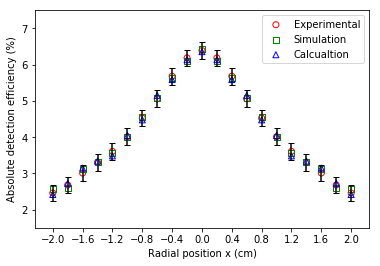

In [2]:
import pandas as pd
import os
import requests
import numpy
from matplotlib import pyplot as plt


y_positions=[]
df=pd.read_csv("out_put2.csv")
df.columns.values[0] ='Efficiency1'
df.columns.values[1] ='Efficiency2'
df.columns.values[2] ='Efficiency3'



for j in numpy.arange(-2, 2.2, 0.2):
    y_positions.append(j)
Detection_efficiency1=df["Efficiency1"]
Detection_efficiency2=df["Efficiency2"]
Detection_efficiency3=df["Efficiency3"]



average=0
sigma=0
for number in Detection_efficiency1:
    average+=number/21
for number in Detection_efficiency1:
    sigma+=((number-average)*(number-average)/21)
sigma=math.sqrt(sigma)
e=sigma/math.sqrt(31)
    
        
plt.xlabel("Radial position x (cm)")
plt.ylabel("Absolute detection efficiency (%)")
plt.ylim(1.5,7.5)
plt.xticks(numpy.arange(-2, 2.2, 0.4), fontsize=10)
plt.scatter(y_positions,Detection_efficiency1, color="none", edgecolor="red", label="Experimental")
plt.scatter(y_positions,Detection_efficiency2, color="none", edgecolor="green", marker='s',label="Simulation")
plt.scatter(y_positions,Detection_efficiency3, color="none", edgecolor="blue", marker='^',label="Calcualtion")
plt.legend()
plt.errorbar(y_positions,Detection_efficiency1, yerr=e,color="black", capsize=3,ls="none")
plt.savefig("plot2.pdf", bbox_inches='tight')
plt.show()







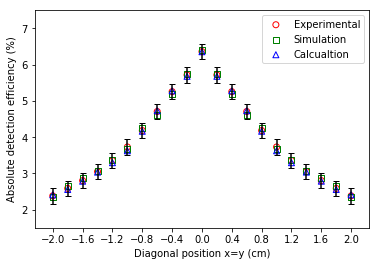

In [3]:
import pandas as pd
import os
import requests
import numpy
from matplotlib import pyplot as plt


y_positions=[]

df=pd.read_csv("out_put3.csv")
df.columns.values[0] ='Efficiency1'
df.columns.values[1] ='Efficiency2'
df.columns.values[2] ='Efficiency3'


for j in numpy.arange(-2, 2.2, 0.2):
    y_positions.append(j)
    
Detection_efficiency1=df["Efficiency1"]
Detection_efficiency2=df["Efficiency2"]
Detection_efficiency3=df["Efficiency3"]


average=0
sigma=0
for number in Detection_efficiency1:
    average+=number/21
for number in Detection_efficiency1:
    sigma+=((number-average)*(number-average)/21)
sigma=math.sqrt(sigma)
e=sigma/math.sqrt(31)
    
    
plt.xlabel("Diagonal position x=y (cm)")
plt.ylabel("Absolute detection efficiency (%)")
plt.ylim(1.5,7.5)
plt.xticks(numpy.arange(-2, 2.2, 0.4), fontsize=10)
plt.scatter(y_positions,Detection_efficiency1, color="none", edgecolor="red", label="Experimental")
plt.scatter(y_positions,Detection_efficiency2, color="none", edgecolor="green", marker='s',label="Simulation")
plt.scatter(y_positions,Detection_efficiency3, color="none", edgecolor="blue", marker='^',label="Calcualtion")
plt.legend()
plt.errorbar(y_positions,Detection_efficiency1, yerr=e,color="black", capsize=3,ls="none")
plt.savefig("plot3.pdf", bbox_inches='tight')
plt.show()


## Calculation of geometrical efficiency for circular side of the detector

In [ ]:
import math
import numpy
from matplotlib import pyplot as plt
R=2.54
t=0.05
y=1
z=1
x_positions=[]
geo_eff_cir=[]
for i in numpy.arange(-2, 2.2, 0.2): 
    x_positions.append(i)
    geo_eff=0.5*(math.cos(1-numpy.arctan((R+t)/y)))*(y/math.sqrt(i*i + y*y + z*z))
    geo_eff_cir.append(geo_eff) 
print(geo_eff_cir)
for number in geo_eff_cir:
    print(number)

plt.plot(x_positions, geo_eff_cir, 'o')
plt.show()


## Calculation of the paobability of survival of photon in the wall and the probability of interaction of the photon for circular side scan of the detector (First method->analytical)

In [ ]:
import math
import numpy
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 



mu=0.20979
R=2.54
t=0.05
h=5.1
integral1=[]
integral2=[]
integral_survive=[]
x_positions=[]
y_positions=[]
products=[]
y=1
for i in numpy.arange(0, 2.4, 0.2):
    x_positions.append(i)  
                           
            
                 
    def bounds_Phi():
        return[0,2*math.pi]
    def bounds_y(Phi):
        return[y,y+t]
    def bounds_ru(y,Phi):
        return [R,R+t]

    def bounds_gamma(ru, y,Phi):
        return [0,numpy.arctan((y+t)/(R+i))]

    def bounds_l(gamma, ru, y,Phi):
        return [y/math.sin(gamma),(y+t)/math.sin(gamma)]
    def f1(l,gamma,ru,y,Phi):
        return exp(-mu*l)*ru
    area= integrate.nquad(f1, [bounds_l, bounds_gamma, bounds_ru, bounds_y, bounds_Phi])
    
    
    
    
    def bounds_Phi2():
        return[0,2*math.pi]
    def bounds_y2(Phi):  
        return[y+t,y+(2*R)]
    def bounds_ru2(y,Phi):
        return [0,R]

    def bounds_gamma2(ru, y,Phi):
        return [0,math.pi-numpy.arctan((y+t)/(R-i))]

    def bounds_l2(gamma, ru, y,Phi):
        return [(y+t)/math.sin(gamma),(R+i)/math.cos(gamma)]
    def f2(l,gamma,ru,y,Phi):
        return (1-exp(-mu*l))*ru
    area1=integrate.nquad(f2, [bounds_l2, bounds_gamma2, bounds_ru2, bounds_y2, bounds_Phi2])
    integral2.append(area1[0])
                   


## Calculation of the paobability of survival of photon in the wall and the probability of interaction of the photon for circular side scan of the detector (Second method->numerical)

In [ ]:
import math
import numpy
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.20979
R=2.54
t=0.05
h=5.1
n=0
j=0.001
y=1
integral1=[]
integral2=[]
integral_survive=[]
x_positions=[]
y_positions=[]
functions_surv=[]
functions_intr=[]
products=[]
intervals=[]
each_interval=[]
absolut_cir_eff=[]
gamma=[]
sub_rangea=[]


for i in numpy.arange(-2, 2.2, 0.2): 
    x_positions.append(i)
    
    gamma_1=numpy.arctan((y+t)/(R+abs(i)))
    gamma_2=math.pi-numpy.arctan((y+t)/(R-i))
    gamma_3=gamma_2 - gamma_1
    intervals.append(gamma_3)  


for j in intervals:
    sub_range=j/1000
    sub_rangea.append(sub_range) 
    each_interval=j/sub_range
   

        
for i in numpy.arange(-2, 2.2, 0.2):
        function_surv=0
        for n in range(1,1001):
            function_surv+= ((1/2)*((R+t)*(R+t)-R*R))*t*(2*math.pi)*((-1/mu)*math.exp(-mu*(y+t)/math.sin(numpy.arctan((y+t)/(R+abs(i))+n*sub_range)))*sub_range-(-1/mu)*math.exp(-mu*(y)/math.sin(numpy.arctan((y+t)/(R+abs(i))+n*sub_range)))*sub_range)  
        functions_surv.append(abs(function_surv))
        function_intr=0  
        for m in range(1,1001):
            function_intr+=(((1/2)*(R*R)*(2*R-t)*(2*math.pi)*(((R+abs(i))/(math.cos(numpy.arctan((y+t)/(R+abs(i))+m*sub_range))))-((y+t)/(math.sin(numpy.arctan((y+t)/(R+abs(i))+m*sub_range))))) -((1/2)*(R*R))*(2*R-t)*(2*math.pi)*((-1/mu)*math.exp(-mu*(R+abs(i))/math.cos(numpy.arctan((y+t)/(R+abs(i))+m*sub_range)))*sub_range-(-1/mu)*math.exp(-mu*(y+t)/math.sin(numpy.arctan((y+t)/(R+abs(i))+m*sub_range)))*sub_range)))
        functions_intr.append(abs(function_intr)) 
print("Survival:")  



for k in functions_surv:
    print(k)
print("Interaction:")     
for k in functions_intr:
    print(k)
        
        
plt.plot(x_positions,functions_surv, 'o')
plt.show()  
plt.plot(x_positions,functions_intr, 'o')
plt.show()
geo_eff_cir=numpy.asarray(geo_eff_cir)
functions_surv=numpy.asarray(functions_surv)
functions_intr=numpy.asarray(functions_intr)
for num1 , num2 in zip(geo_eff_cir,functions_surv):
    total_num=num1*num2*50
    absolut_cir_eff.append(total_num)
    
    
print(absolut_cir_eff)
plt.plot(x_positions, absolut_cir_eff, 'o')
plt.show()


    
       
    
     

### Another aproach to calculate the geometrical detection efficiency of the detector(Cylindrical side scan)

[-2.0, -1.8, -1.6, -1.4000000000000001, -1.2000000000000002, -1.0000000000000002, -0.8000000000000003, -0.6000000000000003, -0.40000000000000036, -0.2000000000000004, -4.440892098500626e-16, 0.1999999999999993, 0.39999999999999947, 0.5999999999999996, 0.7999999999999994, 0.9999999999999991, 1.1999999999999993, 1.3999999999999995, 1.5999999999999992, 1.799999999999999, 1.9999999999999991]
[-2.0, -1.8, -1.6, -1.4000000000000001, -1.2000000000000002, -1.0000000000000002, -0.8000000000000003, -0.6000000000000003, -0.40000000000000036, -0.2000000000000004, -4.440892098500626e-16, 0.1999999999999993, 0.39999999999999947, 0.5999999999999996, 0.7999999999999994, 0.9999999999999991, 1.1999999999999993, 1.3999999999999995, 1.5999999999999992, 1.799999999999999, 1.9999999999999991]
These are x positions:
-2.0
-1.8
-1.6
-1.4000000000000001
-1.2000000000000002
-1.0000000000000002
-0.8000000000000003
-0.6000000000000003
-0.40000000000000036
-0.2000000000000004
-4.440892098500626e-16
0.19999999999999

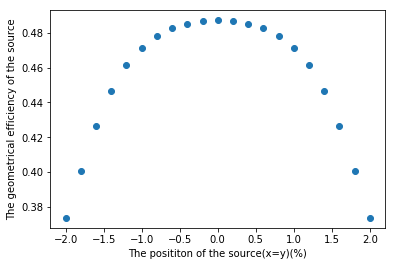

In [10]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.29433
R=2.54
t=0.05
h=5.1
z=1

x_positions=[]
y_positions=[]
r_initial=[]
r_final=[]
h_initial=[]
h_final=[]
geo_eff=[]



for i in numpy.arange(-2, 2.2, 0.2): 
      x_positions.append(i)
for j in numpy.arange(-2, 2.2, 0.2):
      y_positions.append(j) 
        
print(x_positions)
print(y_positions)

print("These are x positions:")
for i in numpy.arange(-2, 2.2, 0.2): 
      for j in numpy.arange(-2, 2.2, 0.2):
            if (x_positions.index(i)==y_positions.index(j)):
                print(i)
                
print("These are y positions:")
for i in numpy.arange(-2, 2.2, 0.2): 
      for j in numpy.arange(-2, 2.2, 0.2):
            if (x_positions.index(i)==y_positions.index(j)):
                print(j)
                
for i in numpy.arange(-2, 2.2, 0.2): 
      for j in numpy.arange(-2, 2.2, 0.2):
            if (x_positions.index(i)==y_positions.index(j)):
                r_s=math.sqrt(i**2+z**2)
                r_i=i-(R+t)
                r_initial.append(r_i)
                r_f=i+(R+t)
                r_final.append(r_f)
                h_i=j-h/2
                h_initial.append(h_i)
                h_f=j+h/2
                h_final.append(h_f)
                geometrical_efficiency=(1/(4*math.pi))*((numpy.arctan(r_f*h_f/r_s*math.sqrt(r_s**2+r_f**2+h_f**2))+numpy.arctan(r_i*h_i/r_s*math.sqrt(r_s**2+r_i**2+h_i**2)))-(numpy.arctan(r_f*h_i/r_s*math.sqrt(r_s**2+r_f**2+h_i**2))+numpy.arctan(r_i*h_f/r_s*math.sqrt(r_s**2+r_i**2+h_f**2))))
                geo_eff.append(geometrical_efficiency)
                
print("These are the values of r_i:")                
for i in r_initial: 
    print(i)
print("These are the values of r_f:")
for i in r_final:
    print(i)
    
 
plt.plot(x_positions, geo_eff, 'o')
plt.xlabel("The posititon of the source(x=y)(%)")
plt.ylabel("The geometrical efficiency of the source")
plt.show()
                
               


### The intrisic detection efficiency of the detector calculated previously(Cylindrical side scan)

0.37875726074552696
0.37031971248048373
0.36278976966518317
0.35728423135610066
0.3546156289516931
0.35539198678863604
0.35995533280234515
0.3681906957416713
0.379125170759652
0.39015018903342696
0.3957400976898542
0.39015018903342696
0.3791251707596517
0.3681906957416714
0.3599553328023453
0.35539198678863604
0.3546156289516933
0.357284231356101
0.36278976966518284
0.37031971248048356
0.37875726074552696


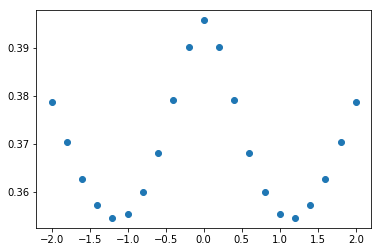

In [11]:
import math
import numpy
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 
mu=0.20979
R=2.54
t=0.05
h=5.1
integral1=[]
integral2=[]
integral_survive=[]
x_positions=[]
y_positions=[]
absolute_eff=[]
z=1
for i in numpy.arange(-2, 2.2, 0.2):
    x_positions.append(i) 
    for j in numpy.arange(-2, 2.2, 0.2):
        y_positions.append(j) 
        if (x_positions.index(i)==y_positions.index(j)):
                    psi=numpy.arcsin(abs(i)/(R+t))
                
                    alpha=numpy.arcsin(abs(i)/R)
                 
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
              
                    
                    
   
             
#Definition of the limits of the intigration for the left side of the cylinder           
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                   
                    
#Definition of the limits of the intigration for the right side of the cylinder   
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f1(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                   
                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_survive=zip(integral1,integral2)
integral_survive = [sum(k) for k in sum_survive]
for number in integral_survive:
    print(number)

plt.plot(x_positions,integral_survive, 'o')
plt.show()

### Calculation of absolute detection efficiency with the new approach(Cylindrical side scan)

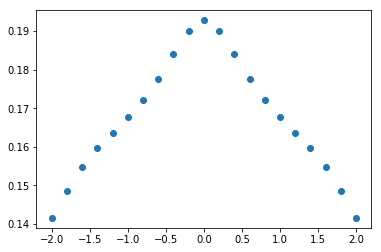

In [12]:
from matplotlib import pyplot as plt
for num1 , num2 in zip(geo_eff,integral_survive):
    total_num=num1*num2
    absolute_eff.append(total_num)
plt.plot(x_positions,absolute_eff, 'o')
plt.show()


### Writing the calculated data to a csv file

In [18]:
import csv
from itertools import zip_longest
Position= x_positions
Efficiency = products
d = [Position, Efficiency]
export_data = zip_longest(*d, fillvalue = '')
with open('test2.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Position", "Efficiency"))
      wr.writerows(export_data)
myfile.close()


### Reading the data from csv file and plotting it again

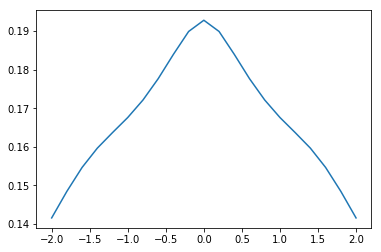

In [16]:
import pandas as pd
import os
import requests
import numpy
from matplotlib import pyplot as plt

df=pd.read_csv("test2.csv")
df
plt.plot(df.Position,df.Efficiency)
plt.show()


In [19]:
import csv
from itertools import zip_longest
Position= x_positions
Efficiency1 = geo_eff
Efficiency2=integral_survive
d = [Position, Efficiency1, Efficiency2]
export_data = zip_longest(*d, fillvalue = '')
with open('test3.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Position", "Efficiency1", "Effficiency2"))
      wr.writerows(export_data)
myfile.close()
